## Задание 1
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

In [5]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

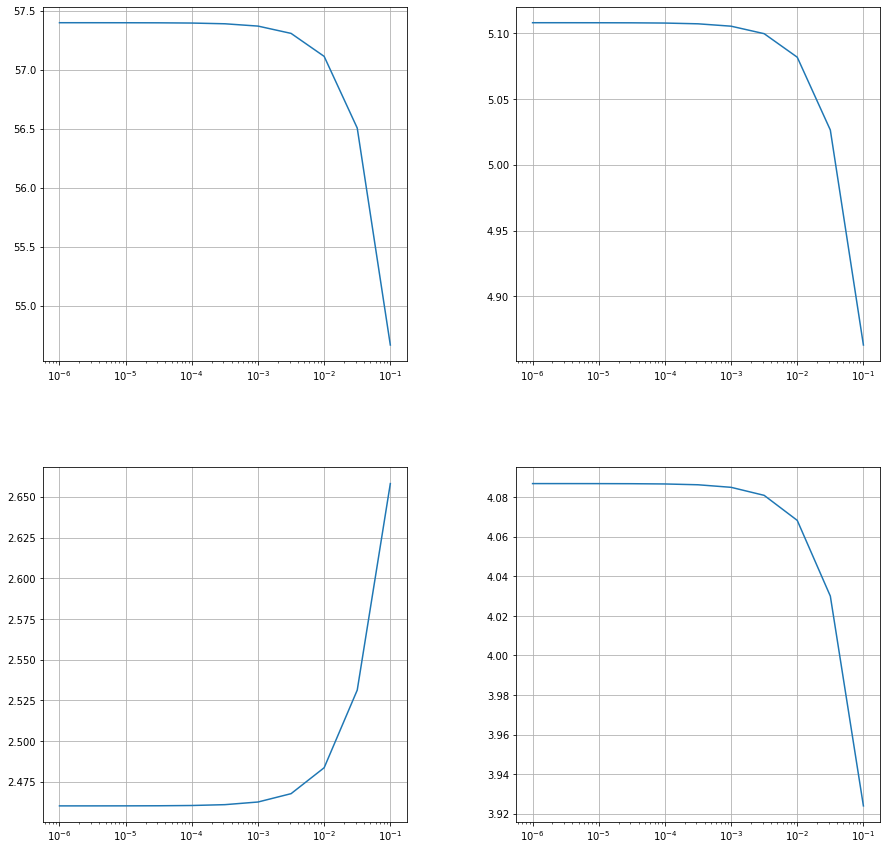

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(15, 15)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

lmb = np.logspace(-6, -1, 11)
w = eval_model_reg2(X_st, y, 500, 1e-2, lmb[0])
for lambda_ in lmb[1:]:
    w = np.vstack((w, eval_model_reg2(X_st, y, 500, 1e-2, lambda_)))

for ind, axes in enumerate(ax.flatten()):
    axes.plot(lmb, w[:, ind])
    axes.set_xscale('log')
    axes.grid()

plt.show()

In [9]:
def eval_model_reg2_ws(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    WS = W.copy()
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            WS = np.vstack((WS, W))
            #print(i, W, err)
    return W, WS

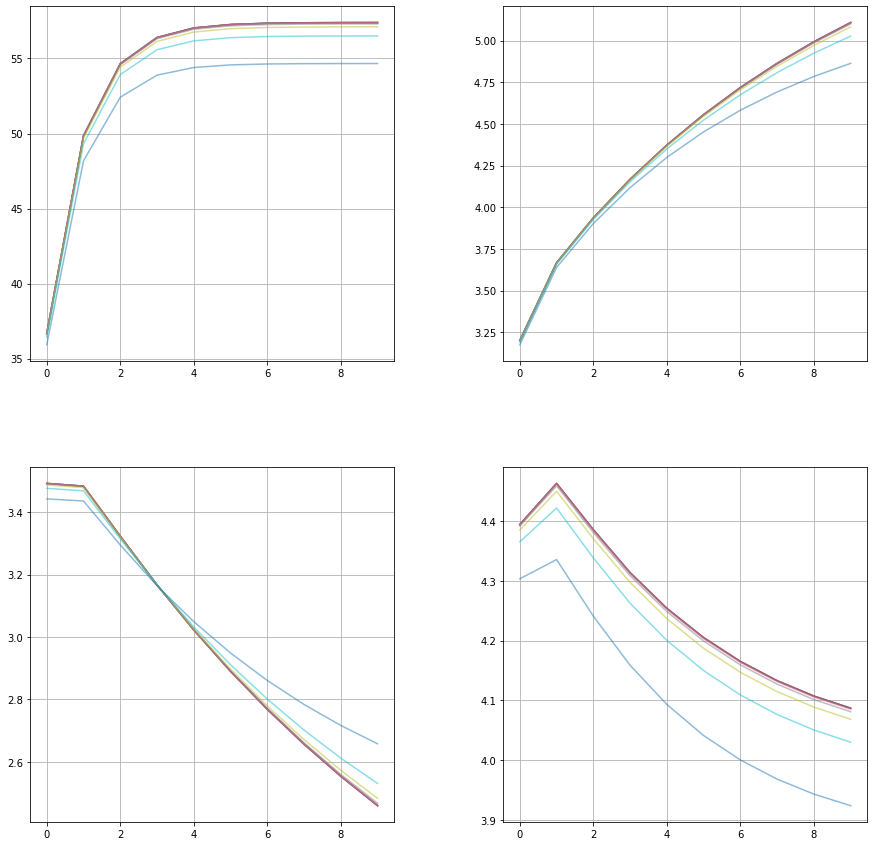

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(15, 15)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for lambda_ in np.logspace(-6, -1, 11):
    w, ws = eval_model_reg2_ws(X_st, y, 500, 1e-2, lambda_)
#     print(ws)
        
    for ind, axes in enumerate(ax.flatten()):
        axes.plot(ws[1:, ind], alpha=0.5)
        axes.grid()

plt.show()

## Задание 2
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

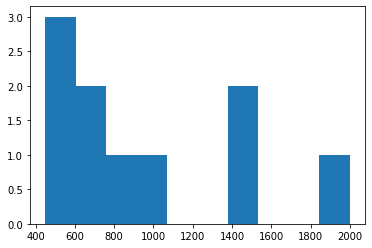

In [11]:
plt.hist(X[2])

In [12]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

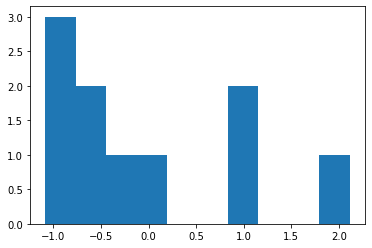

In [13]:
plt.hist(X_st[2])

In [14]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[3] = (X[3] - X[3].min()) / (X[3].max() - X[3].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

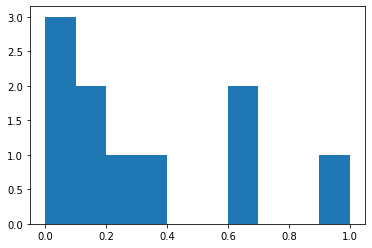

In [15]:
plt.hist(X_norm[2])

In [16]:
X_n_st = X_norm.copy().astype(np.float64)
X_n_st[1] = calc_std_feat(X_norm[1])
X_n_st[2] = calc_std_feat(X_norm[2])
X_n_st[3] = calc_std_feat(X_norm[3])
X_n_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

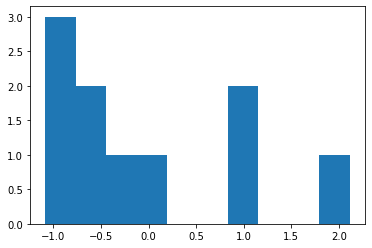

In [17]:
plt.hist(X_n_st[2])

In [18]:
X_st_n = X_st.copy().astype(np.float64)
X_st_n[1] = (X_st[1] - X_st[1].min()) / (X_st[1].max() - X_st[1].min())
X_st_n[2] = (X_st[2] - X_st[2].min()) / (X_st[2].max() - X_st[2].min())
X_st_n[3] = (X_st[3] - X_st[3].min()) / (X_st[3].max() - X_st[3].min())
X_st_n

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

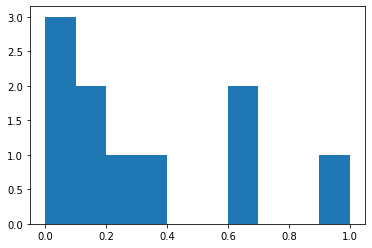

In [19]:
plt.hist(X_st_n[2])

## Вывод: 
Нет. Последовательное применение стандартизации и нормализации даёт на выходе результат последнего действия.

## Задание 3
Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [21]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + np.sign(W) * lambda_) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_model_reg1(X_st, y, iterations=200, alpha=1e-2, lambda_=1e-4)

20 [19.41090444  2.17045402  2.76319445  3.63318775] 1553.7632566225589
40 [32.03816865  2.9955775   3.38679305  4.27605093] 711.9229524097515
60 [40.46823091  3.34192216  3.53470138  4.45161323] 339.6677164937483
80 [46.09620767  3.5312376   3.53207014  4.47974651] 174.0071306056068
100 [49.85348982  3.66667278  3.48290021  4.46268208] 100.15366152011755
120 [52.36188133  3.78141207  3.42042275  4.43301093] 67.19465429412826
140 [54.03650351  3.88624136  3.35522298  4.40104556] 52.463380580366746
160 [55.15449462  3.98477042  3.29064044  4.36997598] 45.859516787303946
180 [55.9008744   4.07830461  3.22769729  4.34071948] 42.881285432807935
200 [56.39916349  4.16740442  3.16667541  4.31347221] 41.52197492599457


array([56.39916349,  4.16740442,  3.16667541,  4.31347221])